# Lab 3 - Prior and Posterior predictive distributions

In [1]:
from cmdstanpy import CmdStanModel
import arviz as az 
import numpy as np

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Modeling prior predictive distribution

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Data-Analytics/Lab3/prior_model.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Data-Analytics/Lab3/prior_model
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Data-Analytics/Lab3/prior_model
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:>

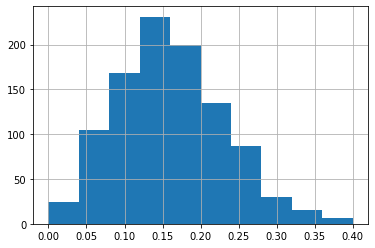

In [24]:
priori_quant = CmdStanModel(stan_file='prior_model.stan')
samples = priori_quant.sample(fixed_param=True, iter_sampling=1000)
ratio = samples.draws_pd()["y"] / samples.draws_pd()["N"]
ratio.hist()

In [25]:
ratio.mean()

0.15048000000000003

### Modeling posterior and posterior predictive distribution

In [4]:
posterior_quant = CmdStanModel(stan_file='posterior_model.stan')

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Data-Analytics/Lab3/posterior_model.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Data-Analytics/Lab3/posterior_model
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Data-Analytics/Lab3/posterior_model


In [5]:
N = 50
y = 7
samples = posterior_quant.sample(data={'N':N, 'y':y})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:>

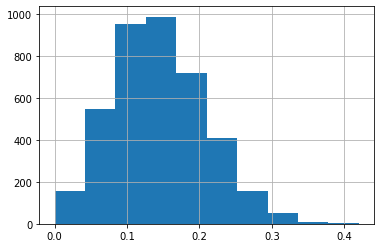

In [6]:
ratio = samples.draws_pd()["y_pred"] / N
ratio.hist()

In [16]:
ratio_pred_mean = ratio.mean()
ratio_pred_interval = az.hdi(np.array(ratio))

p_ratio =  samples.draws_pd()["p"]
p_ratio_mean = p_ratio.mean()
p_ratio_interval = az.hdi(np.array(p_ratio))

print(f'Predicted ratio:\nexpected value: {ratio_pred_mean}\n94% density interval: {ratio_pred_interval}')
print(f'Parameter p:\nexpected value: {p_ratio_mean}\n94% density interval: {p_ratio_interval}')

Predicted ratio:
expected value: 0.147465
94% density interval: [0.02 0.24]
Predicted ratio:
expected value: 0.1470199349
94% density interval: [0.082506 0.209186]


In [22]:
prob = (np.array(ratio) < 0.2).sum() / np.array(ratio).shape[0]
prob

0.76825